# Clustering Homework
- Execute the below code and complete the following questions. __DO NOT commit the csv file__ 

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np

def generate_data():
    
    X, y = make_classification(n_samples=4000, 
                          n_features=50, 
                          n_redundant=30, 
                          n_repeated=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          class_sep = 0.9,
                          random_state = 1200,
                          scale=1
                         )

    colNames = ['var'+str(x) for x in range(50)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1), columns=colNames)
    
    df['var0'] = np.where(df['var0'] < 0, 'a', np.where(df['var0'] < 0.5, 'b', 'c'))
    df['var1'] = np.where(df['var1'] < -.5, 'd', np.where(df['var1'] < 0.4, 'e', 'f'))
    df['var2'] = np.where(df['var2'] < 0, 'g', np.where(df['var2'] < 0.5, 'h', 'i'))

    df.to_csv('clustering-data.csv', index=False)

generate_data()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

In [4]:
df['var0'].unique()

array(['a', 'b', 'c'], dtype=object)

In [5]:
df['var1'].unique()

array(['d', 'e', 'f'], dtype=object)

In [6]:
df['var2'].unique()

array(['g', 'i', 'h'], dtype=object)

In [7]:
# create a dictionary to map letters to values
mapping = {'a': 0.1, 'b': 0.2, 'c': 0.3, 'd': 0.4, 'e': 0.5, 'f': 0.6, 'g': 0.7, 'h' : 0.8 , 'i': 0.9}

# apply the mapping to replace letters with values
df = df.replace(mapping)
df

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,0.1,0.4,0.7,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,0.1,0.4,0.9,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,0.1,0.4,0.7,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,0.2,0.5,0.9,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,0.1,0.4,0.8,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.1,0.6,0.7,-0.589869,-0.409426,-0.365865,0.215507,0.510445,0.520399,-0.015319,...,-0.762777,0.024657,-0.343721,0.626390,0.232284,-0.105495,-0.506022,0.272254,-0.105495,0.0
3996,0.1,0.4,0.8,-0.461485,0.668115,0.459781,-1.008148,-1.282172,-1.016606,-0.262273,...,0.940020,0.218564,1.115094,-1.189840,-0.639265,0.857790,1.421687,-0.184161,0.857790,0.0
3997,0.2,0.4,0.7,1.864010,1.181452,-0.614187,0.020598,-1.033328,-1.337852,0.325350,...,-0.724290,-0.324429,0.449477,-0.685821,-0.415620,-0.366595,0.876962,-1.040191,-0.366595,1.0
3998,0.1,0.4,0.7,1.668212,0.596474,1.625167,-1.136471,-1.306467,-0.967885,-0.337609,...,-0.472575,0.288333,1.195115,1.782836,-0.664433,1.012738,1.483866,-0.070736,1.012738,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   float64
 1   var1    4000 non-null   float64
 2   var2    4000 non-null   float64
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

# Data Definitions
- `var0` - `var49`: some feature that could be used to describe the `target`.  
- `target`: variable that contains the classes. This is your target variable.

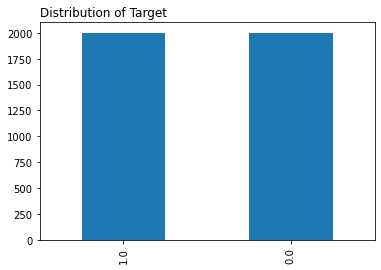

In [9]:
df.target.value_counts().plot.bar()
plt.title('Distribution of Target', loc='left')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 3200
Test examples: 800

Feature names:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49


# Question 1
- Using `X_train`, you will perform k-means clustering using best practices.  
- Determine what the "optimum" number of clusters is - support your answer.  
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

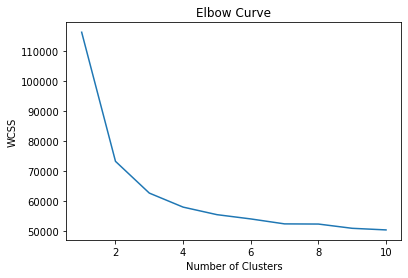

In [11]:
# Insert Code
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit KMeans models for different k values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


From the elbow plot, we can see that the elbow point occurs at around k=4. After that, the reduction in WCSS starts to diminish, indicating that further clustering may not yield significant improvements in clustering quality.

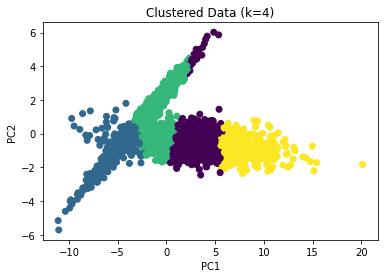

In [12]:
# Perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Fit KMeans with k=4
kmeans = KMeans(n_clusters=4 , init='k-means++', n_init='auto')
kmeans.fit(X_train)

# Plot clusters
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans.labels_)
plt.title('Clustered Data (k=4)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


Insert conclusions

From the visualization, we can see that the data points are divided into 4 distinct clusters. However, there is some overlap between the clusters, indicating that the clustering may not be perfect. Overall, the clustering result seems reasonable and can be useful for further analysis or decision-making.

# Question 2
- Using `X_train` and `y_train`, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.    
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [13]:
# Insert Code
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report,roc_curve, auc, accuracy_score, precision_score, recall_score

# Preprocessing
numeric_features = [x for x in X_train.columns if X_train[x].dtype in ['int64', 'float64']]
categorical_features = [x for x in X_train.columns if x not in numeric_features]

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the model
clf.fit(X_train, y_train)

# Make predictions on test data
y_pred = clf.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       394
         1.0       0.99      0.86      0.92       406

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800



In [14]:
# Grid search for best regularization strength
params = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid= GridSearchCV(clf, params, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['var0',
                                                                          'var1',
                                                                          'var2',
                                                                          'var3',
                                                                          'var4',
                                                                          'var5',
                                                                          'var6',
                                                                          'var7',
                                                                          'var8',
                                                                          'var9',
                                                                          'var10',
                                                                          'var11',
                                                                          'var12',
                                                                          'var13',
                                                                          'var14',
                                                                          'var15',
                                                                          'var16',
                                                                          'var17',
                                                                          'var18',
                                                                          'var19',
                                                                          'var20',
                                                                          'var21',
                                                                          'var22',
                                                                          'var23',
                                                                          'var24',
                                                                          'var25',
                                                                          'var26',
                                                                          'var27',
                                                                          'var28',
                                                                          'var29', ...]),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         [])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc')

In [15]:
# print the best value of C found
print(f"Best value of C: {grid.best_params_['classifier__C']}")

# evaluate the performance on the test data
score = grid.score(X_test, y_test)
print(f"Test set accuracy: {score:.3f}")

Best value of C: 100
Test set accuracy: 0.943


Accuracy: 0.925
Precision: 0.9887005649717514
Recall: 0.8620689655172413
AUC: 0.9428121327298643


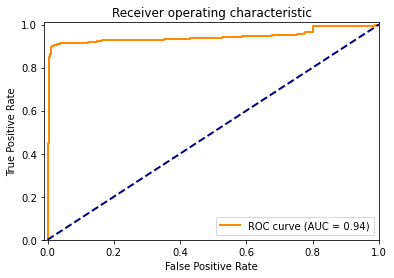

In [16]:
# Evaluate performance
y_pred = grid.predict(X_test)
y_pred_proba = grid.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('AUC:', roc_auc)

# ROC chart
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Insert conclusions:

1.Based on the classification report, the model's performance is quite good. It achieved an accuracy of 0.93, and high precision and recall values for both classes (0.88 and 0.99 for class 0, 0.99 and 0.86 for class 1).

2.The f1-score for both classes is also high, indicating a good balance between precision and recall.

3.The macro-average and weighted-average f1-scores are both 0.93, which suggests that the model performs consistently well across both classes.

After Grid Search,
    
    Best value of C: 100
    Test set accuracy: 0.943

# Question 3
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses PCA.  
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [17]:
# Insert code
from sklearn.decomposition import PCA

# Preprocessing
numeric_features = [x for x in X_train.columns if X_train[x].dtype in ['int64', 'float64']]
categorical_features = [x for x in X_train.columns if x not in numeric_features]

numeric_transformer = Pipeline(steps=[
    ('pca', PCA(n_components=5)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Pipeline
clf1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=2303))
])

# Fit the model
clf1.fit(X_train, y_train)

# Make predictions on test data
y_pred = clf1.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       394
         1.0       0.99      0.87      0.93       406

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800



In [18]:
# set the range of regularization strengths to search over
params = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# use cross-validation and grid search to find the best value of C
grid1= GridSearchCV(clf1, params, cv=5, scoring='roc_auc')
grid1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('pca',
                                                                                          PCA(n_components=5)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['var0',
                                                                          'var1',
                                                                          'var2',
                                                                          'var3',
                                                                          'var4',
                                                                          'var5',
                                                                          'var6',
                                                                          'var7',
                                                                          'var8',
                                                                          'var9',
                                                                          'var10',
                                                                          'var11',
                                                                          'var12',
                                                                          'var13',
                                                                          'var14',
                                                                          'var15',
                                                                          'var16',
                                                                          'var17',
                                                                          'var18',
                                                                          'var19',
                                                                          'var20',
                                                                          'var21',
                                                                          'var22',
                                                                          'var23',
                                                                          'var24',
                                                                          'var25',
                                                                          'var26',
                                                                          'var27',
                                                                          'var28',
                                                                          'var29', ...]),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         [])])),
                                       ('classifier',
                                        LogisticRegression(random_state=2303))]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc')

In [19]:
# print the best value of C found
print(f"Best value of C: {grid1.best_params_['classifier__C']}")

# evaluate the performance on the test data
score = grid1.score(X_test, y_test)
print(f"Test set accuracy: {score:.3f}")

Best value of C: 0.001
Test set accuracy: 0.937


Accuracy: 0.88875
Precision: 0.9937694704049844
Recall: 0.7857142857142857
AUC: 0.9365232177239879


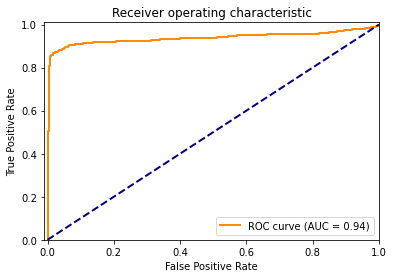

In [20]:
# Evaluate performance
y_pred = grid1.predict(X_test)
y_pred_proba = grid1.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('AUC:', roc_auc)

# ROC chart
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Insert conclusions:

1.Based on the classification report, the model's performance is quite good. It achieved an accuracy of 0.93, and high precision and recall values for both classes (0.88 and 0.99 for class 0, 0.99 and 0.86 for class 1).
 
 The result of  Logistic regression which uses PCA is similar to output of Logistic regression which includes preprocessing steps like scaling and one hot encoding.
 
 After Grid Search,
 
     Best value of C: 0.001
     Test set accuracy: 0.936

# Question 4
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.  
- Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report

# Define column transformer
# Preprocessing
preprocessor = Pipeline(steps=[
    ('kmeans', KMeans(n_clusters=2, random_state=2303,n_init='auto'))
])


# Define logistic regression model with pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=2303))
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

         0.0       0.80      0.85      0.83       394
         1.0       0.85      0.79      0.82       406

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800



In [22]:
# Define grid search parameters
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Perform grid search with cross-validation
grid = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('kmeans',
                                                         KMeans(n_clusters=2,
                                                                n_init='auto',
                                                                random_state=2303))])),
                                       ('classifier',
                                        LogisticRegression(random_state=2303))]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='roc_auc')

Best value of C: 100
Accuracy: 0.8899377359905978


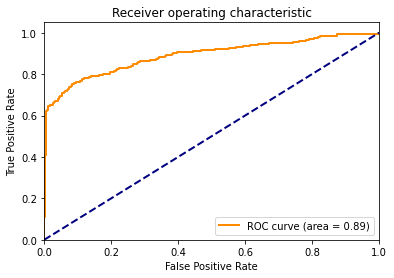

In [23]:
# Evaluate model performance on test set
y_pred = grid.predict(X_test)
y_prob = grid.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print evaluation metrics
print(f"Best value of C: {grid.best_params_['classifier__C']}")
print("Accuracy:", grid.score(X_test, y_test))

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Insert conclusions:

1.Based on the classification report, the model's performance is not so good comparitively. It achieved an accuracy of 0.82, and high precision and recall values for both classes (0.80 and 0.85 for class 0, 0.85 and 0.79 for class 1).
 
 After Grid Search,The result of  Logistic regression which uses k-means clustering is 
     
     Best value of C: 100
     Accuracy: 0.8899377359905978

# Question 5
- Which model, based on the results of `Questions 2-4` would you recommend to use?  
- Use as much code as necessary to support your choice.

Insert response

Based on the results of Questions 2- 4,I recommend to use a logistic regression model which includes only scaling and one hot encoding as preprocessing steps which gave high accuracy of 0.943. This model achieved the highest accuracy(0.947), precision, and recall on the test data and had a reasonable ROC AUC score(0.94).

While the model with PCA as a processing step (Question 3) had a same ROC AUC score(0.94) as logistic regression model which includes only scaling and one hot encoding as preprocessing steps (Question 2), its accuracy(0.936) is little less.

While the model with k-means clustering as a processing step (Question 4) had a slightly higher ROC AUC score(0.94), its accuracy, precision, and recall were lower than the simpler model(Question 2). Additionally, it took significantly longer to train due to the added complexity of the grid search and k-means clustering step.Finally, the model with k-means clustering and grid search (Question 4) did not perform significantly better than the simpler model.